In [8]:
import tensorflow as tf
from datasets import dataset_utils
import os

In [11]:
from src import build_image_data
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
import os
import random
import sys
import threading

From comandline, run src/build_image_data.py --train_directory TRAIN_DIRECTORY --validation_directory VALIDATION_DIRECTORY --output_directory OUTPUT_DIRECTORY --labels_file labels.txt

Creates TFRecords

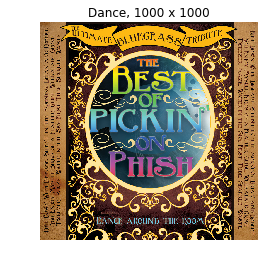

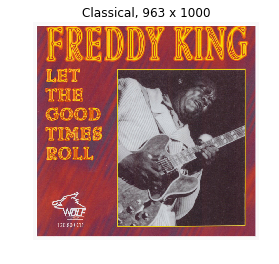

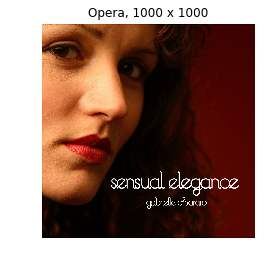

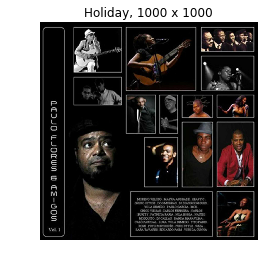

In [44]:
slim = tf.contrib.slim
from datasets import flowers

album_data_dir = '/Users/datascientist/amanda/album_art/test_images/'

with tf.Graph().as_default(): 
    dataset = flowers.get_split('train', album_data_dir)
    data_provider = slim.dataset_data_provider.DatasetDataProvider(
        dataset, common_queue_capacity=32, common_queue_min=1)
    image, label = data_provider.get(['image', 'label'])

    
    with tf.Session() as sess:    
        with slim.queues.QueueRunners(sess):
            for i in xrange(4):
                np_image, np_label = sess.run([image, label])
                height, width, _ = np_image.shape
                class_name = name = dataset.labels_to_names[np_label]
                
                plt.figure()
                plt.imshow(np_image)
                plt.title('%s, %d x %d' % (name, height, width))
                plt.axis('off')
                plt.show()

# Convolutional neural nets (CNNs).
<a id='CNN'></a>

In this section, we show how to train an image classifier using a simple CNN.

### Define the model.

Below we define a simple CNN. Note that the output layer is linear function - we will apply softmax transformation externally to the model, either in the loss function (for training), or in the prediction function (during testing).

In [45]:
def my_cnn(images, num_classes, is_training):  # is_training is not used...
    with slim.arg_scope([slim.max_pool2d], kernel_size=[3, 3], stride=2):
        net = slim.conv2d(images, 64, [5, 5])
        net = slim.max_pool2d(net)
        net = slim.conv2d(net, 64, [5, 5])
        net = slim.max_pool2d(net)
        net = slim.flatten(net)
        net = slim.fully_connected(net, 192)
        net = slim.fully_connected(net, num_classes, activation_fn=None)       
        return net

In [47]:
from preprocessing import inception_preprocessing